# Valuación de opciones asiáticas 

- Las opciones que tratamos la clase pasada dependen sólo del valor del precio del subyacente $S_t$, en el instante que se ejerce.

- Cambios bruscos en el precio, cambian que la opción esté *in the money* a estar *out the money*.

- **Posibilidad de evitar esto** $\longrightarrow$ suscribir un contrato sobre el valor promedio del precio del subyacente. 

- <font color ='red'> Puede proveer protección contra fluctuaciones extremas del precio en mercados volátiles. </font>

- **Nombre**: Banco Trust de Tokio ofreció este tipo de opciones

### ¿Dónde se negocian?

- Mercados OTC (Over the Counter / Independientes).

- Las condiciones para el cálculo matemático del promedio y otras condiciones son especificadas en el contrato. Lo que las hace un poco más “personalizables”. 

Existen diversos tipos de opciones asiáticas y se clasiflcan de acuerdo con lo siguiente.

1. La media que se utiliza puede ser **aritmética** o geométrica.
    - Media aritmética: $$ \bar x = \frac{1}{n}\sum_{i=1}^{n} x_i$$
    - Media geométrica: $$  {\bar {x}}={\sqrt[{n}]{\prod _{i=1}^{n}{x_{i}}}}={\sqrt[{n}]{x_{1}\cdot x_{2}\cdots x_{n}}}$$
        * **Ventajas**:
            - Considera todos los valores de la distribución.
            - Es menos sensible que la media aritmética a los valores extremos.
        * **Desventajas**
            - Es de significado estadístico menos intuitivo que la media aritmética.
            - Su cálculo es más difícil.
            - Si un valor $x_i = 0$  entonces la media geométrica se anula o no queda determinada.

La media aritmética de un conjunto de números positivos siempre es igual o superior a la media geométrica:
$$
\sqrt[n]{x_1 \cdot x_2 \dots x_n} \le \frac{x_1+ \dots + x_n}{n}
$$   

2. Media se calcula para $S_t \longrightarrow$ "Precio de ejercicio fijo". Media se calcula para precio de ejercicio $\longrightarrow$ "Precio de ejercicio flotante". 

3. Si la opción sólo se puede ejercer al final del tiempo del contrato se dice que es asiática de tipo europeo o **euroasiática**, y si puede ejercer en cualquier instante, durante la vigencia del contrato se denomina **asiática de tipo americano.**

Los tipos de opciones euroasiáticas son:

- Call con precio de ejercicio fijo, función de pago: $\max\{A-K,0\}$.
- Put con precio de ejercicio fijo, función de pago: $\max\{K-A,0\}$.
- Call con precio de ejercicio flotante, función de pago: $\max\{S-K,0\}$.
- Put con precio de ejercicio flotante, función de pago: $\max\{K-S,0\}$.

Donde $A$ es el promedio del precio del subyacente.

$$\text{Promedio aritmético} \quad A={1\over T} \int_0^TS_tdt$$
$$\text{Promedio geométrico} \quad A=\exp\Big({1\over T} \int_0^T Ln(S_t) dt\Big)$$

De aquí en adelante denominaremos **Asiática ** $\longrightarrow$ Euroasiática y se analizará el call asiático con **K Fijo**.

Se supondrá un solo activo con riesgo, cuyos proceso de precios $\{S_t | t\in [0,T]\}$ satisface un movimiento browniano geométrico, en un mercado que satisface las suposiciones del modelo de Black y Scholes.

__Suposiciones del modelo__:
- El precio del activo sigue un movimiento browniano geométrico. 
$$\frac{dS_t}{S_t}=\mu dt + \sigma dW_t,\quad 0\leq t \leq T, S_0 >0$$
- El comercio puede tener lugar continuamente sin ningún costo de transacción o impuestos.
- Se permite la venta en corto y los activos son perfectamente divisibles. Por lo tanto, se pueden vender activos que no son propios y se puede comprar y vender cualquier número (no necesariamente un número entero) de los activos subyacentes.
- La tasa de interés libre de riesgo continuamente compuesta es constante.
- Los inversores pueden pedir prestado o prestar a la misma tasa de interés sin riesgo.
- No hay oportunidades de arbitraje sin riesgo. De ello se deduce que todas las carteras libres de riesgo deben obtener el mismo rendimiento.

Recordemos que bajo esta medida de probabilidad, $P^*$, denominada de riesgo neutro, bajo la cual el precio del activo, $S_t$, satisface:

$$dS_t = rS_tdt+\sigma S_tdW_t,\quad 0\leq t \leq T, S_0 >0$$

Para un call asiático de promedio aritmético y con precio de ejercicios fijo, está dado por
$$\max \{A(T)-K,0\} = (A(T)-K)_+$$

con $A(x)={1\over x} \int_0^x S_u du$

Se puede ver que el valor en el tiempo t de la opción call asiática está dado por:

$$ V_t(K) = e^{-r(T-t)}E^*[(A(T)-K)_+]$$

Para el caso de interés, *Valución de la opción*, donde $t_0=0$ y $t=0$, se tiene:

$$\textbf{Valor call asiático}\longrightarrow V_0(K)=e^{-rT}E\Bigg[ \Big({1\over T} \int_0^T S_u du -K\Big)_+\Bigg]$$ 

## Usando Monte Carlo

Para usar este método es necesario que se calcule el promedio $S_u$ en el intervalo $[0,T]$. Para esto se debe aproximar el valor de la integral por los siguiente dos métodos.

Para los dos esquemas se dividirá el intervalo $[0,T]$ en N subintervalos de igual longitud, $h={T\over N}$, esto determina los tiempos $t_0,t_1,\cdots,t_{N-1},t_N $, en donde $t_i=ih$ para $i=0,1,\cdots,N$

### 1. Sumas de Riemann

$$\int_0^T S_u du \approx h \sum_{i=0}^{n-1} S_{t_i}$$

De este modo, si con el método de Monte Carlo se generan $M$ trayectorias, entonces
la aproximación de el valor del call asiático estaría dada por:

$$\hat V_0^{(1)}= {e^{-rT} \over M} \sum_{j=1}^{M} \Bigg({1\over N} \sum_{i=0}^{N-1} S_{t_i}-K \Bigg)_+$$


### 2. Mejorando la aproximación de las sumas de Riemann (esquema del trapecio)

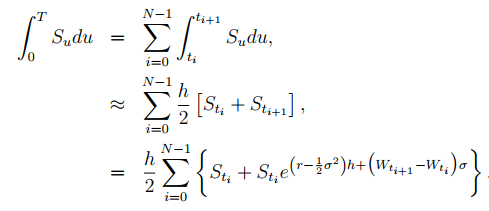

Desarrollando la exponencial en serie de taylor y suponiendo que $h$ es pequeña, sólo se conservan los términos de orden uno, se tiene la siguiente aproximación:
$$\int_0^T S_u du \approx {h \over 2}\sum_{i=0}^{N-1}S_{t_i}(2+rh+(W_{t_{i+1}}-W_{t_i})\sigma)$$

Reemplazando esta aproximación en el precio del call, se tiene la siguiente estimación:
$$\hat V_0^{(2)}= {e^{-rT} \over M} \sum_{j=1}^{M} \Bigg({h\over 2T} \sum_{i=0}^{N-1} S_{t_i}(2+rh+(W_{t_{i+1}}-W_{t_i})\sigma)-K \Bigg)_+$$

> **Referencia**:
http://mat.izt.uam.mx/mat/documentos/notas%20de%20clase/cfenaoe3.pdf

## Ejemplo

Como caso de prueba se seleccionó el de un call asiático con precio inicial, $S_0 = 100$, precio de ejercicio $K = 100$, tasa libre de riesgo $r = 0.10$, volatilidad $\sigma = 0.20$ y $T = 1$ año. Cuyo precio es $\approx 7.04$.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 9)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
def BSprices(mu,sigma,S0,NbTraj,NbStep):
    """
    Expresión de la solución de la ecuación de Black-Scholes
    St = S0*exp((r-sigma^2/2)*t+ sigma*DeltaW)
    
    Parámetros
    ---------
    mu    : Tasa libre de riesgo
    sigma : Desviación estándar de los rendimientos
    S0    : Precio inicial del activo subyacente
    NbTraj: Cantidad de trayectorias a simular
    NbStep: Número de días a simular
    """
    # Datos para la fórmula de St
    nu = mu-(sigma**2)/2
    DeltaT = 1/NbStep
    SqDeltaT = np.sqrt(DeltaT)
    DeltaW = SqDeltaT*np.random.randn(NbTraj,NbStep-1)
    
    # Se obtiene --> Ln St = Ln S0+ nu*DeltaT + sigma*DeltaW
    increments = nu*DeltaT + sigma*DeltaW
    concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
    
    # Se utiliza cumsum por que se quiere simular los precios iniciando desde S0
    LogSt = np.cumsum(concat,axis=1)
    # Se obtienen los precios simulados para los NbStep fijados
    St = np.exp(LogSt)
    # Vector con la cantidad de días simulados
    t = np.arange(0,NbStep)

    return St.T,t

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [3]:
np.random.seed(5555)
NbTraj = 2
NbStep = 100
S0 = 100
r = 0.10
sigma = 0.2
K = 100

# Resolvemos la ecuación de black scholes para obtener los precios
St,t = BSprices(r,sigma,S0,NbTraj,NbStep)
# t = t*NbStep

prices = pd.DataFrame(St,index=t)
prices

,0,1
0,100.000,100.000
1,103.428,100.576
2,108.295,100.804
3,104.025,103.763
4,106.320,100.309
...,...,...
95,136.142,92.727
96,137.405,93.794
97,134.136,96.026
98,133.140,96.604


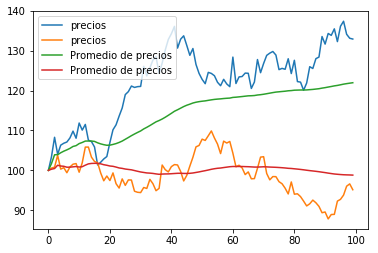

In [4]:
# Graficamos los precios simulados
plt.plot(t,St,label='precios')

# Obtenemos los precios promedios en todo el tiempo y los graficamos 
Average_t = prices.expanding(1,axis=0).mean()
# Average_t = prices.rolling(window=20).mean()
plt.plot(t,Average_t,label='Promedio de precios')
plt.legend()
plt.show()#

In [20]:
(1.5+3)/2, 2.333*2-1.5

(2.25, 3.1660000000000004)

In [25]:
# Ilustración función rolling y expanding
data = pd.DataFrame([
    ['a', 1],
    ['a', 2],
    ['a', 4],
    ['b', 5],
], columns = ['category', 'value'])
print('expanding\n',data.value.expanding(2).sum())
print('rolling\n',data.value.rolling(window=2).sum())

expanding
 0     NaN
1     3.0
2     7.0
3    12.0
Name: value, dtype: float64
rolling
 0    NaN
1    3.0
2    6.0
3    9.0
Name: value, dtype: float64


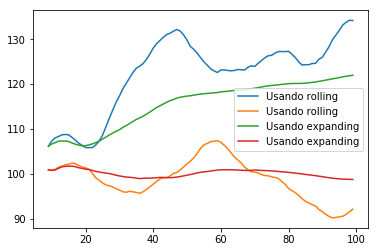

In [6]:
# Diferencia entre el cálculo de la media usando expanding y una ventana móvil
f_expand= prices.expanding(10).mean()
f_rolling = prices.rolling(window=10).mean()
plt.plot(t,f_rolling,label='Usando rolling')
plt.plot(t,f_expand,label='Usando expanding')
plt.legend()
plt.show()

In [29]:
# Explicación de función expanding
pan = pd.DataFrame(np.matrix([[1,2,3],[4,5,6],[7,8,9],[1,1,1]]))
pan.expanding(1,axis=0).mean()

,0,1,2
0,1.00,2.0,3.00
1,2.50,3.5,4.50
2,4.00,5.0,6.00
3,3.25,4.0,4.75


### Método sumas de Riemann

La prima estimada usando 2 trayectoris es: 9.94
El intervalor de confianza usando t-dist es: (6.57405517707332, 13.314037058629602)
El intervalor de confianza usando norm-dist es: (9.424216553543172, 10.463875682159749)


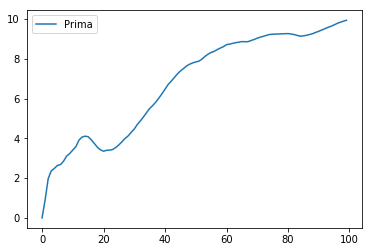

In [8]:
#### Sumas de Riemann
strike = pd.DataFrame(K*np.ones([NbStep,NbTraj]), index=t)
T = 1 # Tiempo de cierre del contrato
call = pd.DataFrame({'Prima':np.exp(-r*T) \
             *np.fmax(Average_t-strike,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
# .mean(axis=1) realiza el promedio entre las columnas de np.fmax() 
# es decir entre las trayectorias simuladas 
call.plot()
print('La prima estimada usando %i trayectoris es: %2.2f'%(NbTraj,call.iloc[-1].Prima))
# intervalos de confianza
confianza = 0.95
sigma_est = call.sem().Prima
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,NbTraj-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print('El intervalor de confianza usando t-dist es:', i1)
print('El intervalor de confianza usando norm-dist es:', i2)
# mean_est

In [9]:
call.iloc[-1].Prima

9.94404611785146

Ahora hagamos pruebas variando la cantidad de trayectorias `NbTraj` y la cantidad de números de puntos `NbStep` para ver como aumenta la precisión del método. Primero creemos una función que realice la aproximación de Riemann

In [10]:
def Riemann_approach(K:'Strike price',r:'Tasa libre de riesgo',S0:'Precio inicial',
                     NbTraj:'Número trayectorias',NbStep:'Cantidad de pasos a simular',
                     sigma:'Volatilidad',T:'Tiempo de cierre del contrato en años'):
    # Resolvemos la ecuación de black scholes para obtener los precios
    St,t = BSprices(r,sigma,S0,NbTraj,NbStep)
    # Almacenamos los precios en un dataframe
    prices = pd.DataFrame(St,index=t)
    # Obtenemos los precios promedios
    Average_t = prices.expanding().mean()
    # Definimos el dataframe de strikes
    strike = pd.DataFrame(K*np.ones([NbStep,NbTraj]), index=t)
    # Calculamos el call de la opción según la formula obtenida para Sumas de Riemann
    call = pd.DataFrame({'Prima':np.exp(-r*T) \
                 *np.fmax(Average_t-strike,np.zeros([NbStep,NbTraj])).mean(axis=1)}, index=t)
    # intervalos de confianza
    confianza = 0.95
    sigma_est = call.sem().Prima
    mean_est = call.iloc[-1].Prima
    i1 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
#     return np.array([call.iloc[-1].Prima,i1[0],i1[1]])
    return call.iloc[-1].Prima

In [11]:
NbTraj = [1000,5000,10000]
NbStep = [10,50,100]

S0 = 100     # Precio inicial
r = 0.10     # Tasa libre de riesgo 
sigma = 0.2  # volatilidad
K = 100      # Strike price
T = 1        # Tiempo de cierre - años

# Call = np.zeros([len(NbTraj),len(NbStep)])
# intervalos = []#np.zeros([len(NbTraj),len(NbStep)])
T = 1
M = list(map(lambda N_tra:list(map(lambda N_ste:Riemann_approach(K,r,S0,N_tra,N_ste,sigma,T),
                                   NbStep)),
                                   NbTraj))
M = np.asmatrix(M)

In [12]:
# Visualización de datos 
filas = ['Nbtray = %i' %i for i in NbTraj]
col = ['NbStep = %i' %i for i in NbStep]
df = pd.DataFrame(index=filas,columns=col)
df.loc[:,:] = M
df

,NbStep = 10,NbStep = 50,NbStep = 100
Nbtray = 1000,6.210,7.160,7.398
Nbtray = 5000,6.471,7.087,7.127
Nbtray = 10000,6.343,6.828,6.933


# Tarea

Implementar el método de esquemas del trapecio, para valuar la opción call y put asiática con precio inicial, $S_0 = 100$, precio de ejercicio $K = 100$, tasa libre de riesgo $r = 0.10$, volatilidad $\sigma = 0.20$ y $T = 1$ año. Cuyo precio es $\approx 7.04$. Realizar la simulación en base a la siguiente tabla:
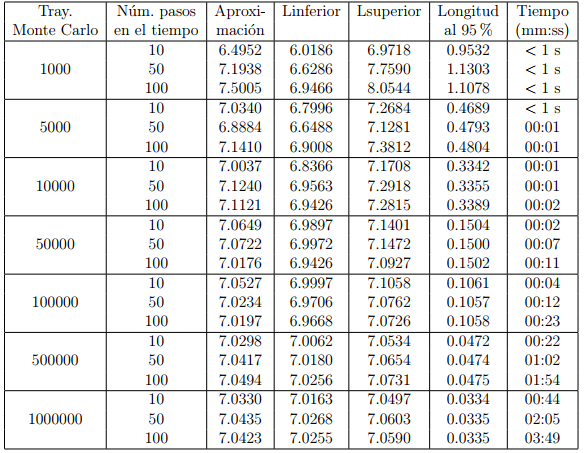

Observe que en esta tabla se encuentran los intervalos de confianza de la aproximación obtenida y además el tiempo de simulación que tarda en encontrar la respuesta cada método. 
- Se debe entonces realizar una simulación para la misma cantidad de trayectorias y número de pasos y construir una Dataframe de pandas para reportar todos los resultados obtenidos.**(70 puntos)**
- Compare los resultados obtenidos con los resultados arrojados por la función `Riemann_approach`. Concluya. **(30 puntos)**

Se habilitará un enlace en canvas donde se adjuntará los resultados de dicha tarea

>**Nota:** Para generar índices de manera como se especifica en la tabla referirse a:
> - https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
> - https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html
> - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Z.
</footer>